# Goal: Find the best place for a new well

The main objective of the project is to determine the optimal region for developing new oil wells that will maximize potential profit while considering associated risks. This is achieved through a series of steps that involve data analysis, model training, profit calculations, and risk assessment. The project aims to identify the region that offers the highest average profit among the available options, while also ensuring that the risk of losses remains below a specified threshold (2.5%). By analyzing geological exploration data, building predictive models, and using statistical techniques like bootstrapping, the project aims to provide a data-driven recommendation for the region that presents the best balance between potential profit and acceptable risk.

Steps to choose the location:

* Collect the oil well parameters in the selected region: oil quality and volume of reserves;
* Build a model for predicting the volume of reserves in the new wells;
* Pick the oil wells with the highest estimated values;
* Pick the region with the highest total profit for the selected oil wells.

## Data Preparation

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading Data
region_1 = pd.read_csv('geo_data_0.csv')
region_2 = pd.read_csv('geo_data_1.csv')
region_3 = pd.read_csv('geo_data_2.csv')

In [3]:
region_1.head(5)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
region_2.head(5)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
region_3.head(5)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [6]:
region_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
# Checking for duplicates
print('Obvious Duplicates', region_3.duplicated().sum())
print('Column Duplicates', region_3['id'].duplicated().sum())

Obvious Duplicates 0
Column Duplicates 4


In [10]:
# Checking for duplicates
print('Obvious Duplicates', region_2.duplicated().sum())
print('Column Duplicates', region_2['id'].duplicated().sum())

Obvious Duplicates 0
Column Duplicates 4


In [11]:
# Checking for duplicates
print('Obvious Duplicates', region_1.duplicated().sum())
print('Column Duplicates', region_1['id'].duplicated().sum())

Obvious Duplicates 0
Column Duplicates 10


In [12]:
# Understanding duplicates
region_3[region_3['id'].duplicated()]

,id,f0,f1,f2,product
43233,xCHr8,-0.847066,2.101796,5.597130,184.388641
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420
55967,KUPhW,1.211150,3.176408,5.543540,132.831802
95090,Vcm5J,2.587702,1.986875,2.482245,92.327572


In [13]:
# Understanding duplicates
region_2[region_2['id'].duplicated()]

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [14]:
# Understanding duplicates
region_1[region_1['id'].duplicated()]

,id,f0,f1,f2,product
7530,HZww2,1.061194,-0.373969,10.430210,158.828695
41724,bxg6G,-0.823752,0.546319,3.630479,93.007798
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205
63593,QcMuo,0.635635,-0.473422,0.862670,64.578675
66136,74z30,1.084962,-0.312358,6.990771,127.643327
69163,AGS9W,-0.933795,0.116194,-3.655896,19.230453
75715,Tdehs,0.112079,0.430296,3.218993,60.964018
90815,fiKDv,0.049883,0.841313,6.394613,137.346586
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008
97785,bsk9y,0.378429,0.005837,0.160827,160.637302


Duplicates on the 'id' column show that the id's for different oil wells were used and requiere modification.

As shown above, there isn't a significant amount of duplicates. Therefore, there is no need to remove them.

## Data Preprocessing



In [15]:
# Assign the 'product' column of region_1 to the 'target' variable
target = region_1['product']

# Drop 'product' and 'id' columns from region_1 and assign the resulting DataFrame to 'features'
features = region_1.drop(['product', 'id'], axis=1)

# Split the features and target data into training and validation sets using train_test_split
# 25% of the data will be used for validation, setting a random state for reproducibility
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# Define a list of column names representing numeric features
numeric = ['f0', 'f1', 'f2']

# Initialize a StandardScaler to standardize the numeric features
scaler = StandardScaler()

# Fit the scaler to the numeric features in the training set
scaler.fit(features_train[numeric])

# Transform (standardize) the numeric features in the training and validation sets using the fitted scaler
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])


In [16]:
# Extract the 'product' column from region_2 and assign it to the variable 'target2'
target2 = region_2['product']

# Remove the 'product' and 'id' columns from region_2 and store the resulting DataFrame in 'features2'
features2 = region_2.drop(['product', 'id'], axis=1)

# Split the features and target data of region_2 into training and validation sets
# The split ratio is 75% for training and 25% for validation, with a specified random state
features_train2, features_valid2, target_train2, target_valid2 = train_test_split(
    features2, target2, test_size=0.25, random_state=1235)

# Define a list of column names representing numeric features in region_2
numeric2 = ['f0', 'f1', 'f2']

# Initialize a StandardScaler object to scale the numeric features in region_2
scaler2 = StandardScaler()

# Fit the scaler to the numeric features in the training set of region_2
scaler2.fit(features_train2[numeric2])

# Standardize the numeric features in both the training and validation sets using the fitted scaler2
features_train2[numeric2] = scaler2.transform(features_train2[numeric2])
features_valid2[numeric2] = scaler2.transform(features_valid2[numeric2])


In [17]:
# Extract the 'product' column from region_3 and assign it to the variable 'target3'
target3 = region_3['product']

# Remove the 'product' and 'id' columns from region_3 and store the resulting DataFrame in 'features3'
features3 = region_3.drop(['product', 'id'], axis=1)

# Split the features and target data of region_3 into training and validation sets
# Using a 75% - 25% split for training and validation, respectively, with a specific random state
features_train3, features_valid3, target_train3, target_valid3 = train_test_split(
    features3, target3, test_size=0.25, random_state=123)

# Define a list of column names representing numeric features in region_3
numeric3 = ['f0', 'f1', 'f2']

# Initialize a StandardScaler object to scale the numeric features in region_3
scaler3 = StandardScaler()

# Fit the scaler to the numeric features in the training set of region_3
scaler3.fit(features_train3[numeric3])

# Standardize the numeric features in both the training and validation sets using the fitted scaler3
features_train3[numeric3] = scaler3.transform(features_train3[numeric3])
features_valid3[numeric3] = scaler3.transform(features_valid3[numeric3])

## Modeling

In [18]:
# Instantiate a LinearRegression model
model = LinearRegression()

# Fit the LinearRegression model using the training features and target data
model.fit(features_train, target_train)

# Make predictions on the validation set using the trained model
predicted_valid = model.predict(features_valid)

# Calculate the mean squared error (MSE) by comparing the predicted values with the actual validation target values
mse = mean_squared_error(target_valid, predicted_valid)

# Create a pandas Series containing the median of the target_train values, indexed similarly to target_valid
predicted_valid_median = pd.Series(target_train.median(), index=target_valid.index)

In [19]:
# Instantiate a LinearRegression model (model_2)
model_2 = LinearRegression()

# Train the LinearRegression model using features_train2 and target_train2
model_2.fit(features_train2, target_train2)

# Generate predictions on the validation set (features_valid2) using the trained model_2
predicted_valid2 = model_2.predict(features_valid2)

# Calculate the mean squared error (MSE2) by comparing predicted_valid2 with target_valid2
mse2 = mean_squared_error(target_valid2, predicted_valid2)

# Create a pandas Series containing the median of the target_train2 values, indexed similarly to target_valid2
predicted_valid_median2 = pd.Series(target_train2.median(), index=target_valid2.index)

In [20]:
# Instantiate a LinearRegression model (model_3)
model_3 = LinearRegression()

# Train the LinearRegression model using features_train3 and target_train3
model_3.fit(features_train3, target_train3)

# Generate predictions on the validation set (features_valid3) using the trained model_3
predicted_valid3 = model_3.predict(features_valid3)

# Calculate the mean squared error (MSE3) by comparing predicted_valid3 with target_valid3
mse3 = mean_squared_error(target_valid3, predicted_valid3)

# Create a pandas Series containing the median of the target_train3 values, indexed similarly to target_valid3
predicted_valid_median3 = pd.Series(target_train3.median(), index=target_valid3.index)

## Analysis For Each Region

In [21]:
print('REGION 1')
print()
print('MSE', mse)
print('RMSE', mse**0.5)
print('Average Volume of Predicted Reserves', predicted_valid.mean())
print()
print('R2 =', r2_score(target_valid, predicted_valid))
print('Linear Regression:', mean_absolute_error(target_valid, predicted_valid))
print('Median:', mean_absolute_error(target_valid, predicted_valid_median))

REGION 1

MSE 1412.2129364399243
RMSE 37.5794217150813
Average Volume of Predicted Reserves 92.59256778438035

R2 = 0.27994321524487786
Linear Regression: 30.919600777151313
Median: 37.67178003955267


In [22]:
print('REGION 2')
print()
print('MSE', mse2)
print('RMSE', mse2**0.5)
print('Average Volume of Predicted Reserves', predicted_valid2.mean())
print()
print('R2 =', r2_score(target_valid2, predicted_valid2))
print('Linear Regression:', mean_absolute_error(target_valid2, predicted_valid2))
print('Median:', mean_absolute_error(target_valid2, predicted_valid_median2))

REGION 2

MSE 0.7993178711189037
RMSE 0.8940457880438248
Average Volume of Predicted Reserves 68.85411912384775

R2 = 0.9996207667316822
Linear Regression: 0.7207740498765781
Median: 40.26518086025505


In [23]:
print('REGION 3')
print()
print('MSE', mse3)
print('RMSE', mse3**0.5)
print('Average Volume of Predicted Reserves', predicted_valid3.mean())
print()
print('R2 =', r2_score(target_valid3, predicted_valid3))
print('Linear Regression:', mean_absolute_error(target_valid3, predicted_valid3))
print('Median:', mean_absolute_error(target_valid3, predicted_valid_median3))

REGION 3

MSE 1610.2587969766078
RMSE 40.12803006598514
Average Volume of Predicted Reserves 95.09859933591373

R2 = 0.19313657905573023
Linear Regression: 32.80763017044863
Median: 37.743284150615594


## Profit Calculation

The volume of reserves needed for developing a new well without losses. Comparison of the obtained values with the average volume of reserves in each region.

* Budget for Developing Oil Wells: We have a budget of 100 million US dollars to develop 200 new oil wells.

* Revenue from Raw Materials: When we extract one barrel of oil, it brings in 4.5 US dollars in revenue.

* Revenue from Product Units: Each unit of the product we produce (measured in thousand barrels) brings in 4,500 US dollars in revenue.

* Managing Risk: After evaluating the risks, we decide to only consider regions where the risk of financial losses is less than 2.5%. Among these safe regions, we'll choose the one that can give us the highest average profit.

product — volume of reserves in the oil well (thousand barrels).

In [24]:
budget = 100000000  # Budget in million USD
revenue_per_unit = 4500  # Revenue per unit of product in USD
number_oil_wells = 200

# Calculate the volume of reserves in thousand barrels needed to cover the budget
volume_needed = (budget/number_oil_wells)/revenue_per_unit

print(f"Volume of reserves needed for development without losses: {volume_needed} thousand barrels")


Volume of reserves needed for development without losses: 111.11111111111111 thousand barrels


In [25]:
average_volume_region1 = region_1['product'].mean()
average_volume_region2 = region_2['product'].mean()
average_volume_region3 = region_3['product'].mean()

# Compare the volume needed for development without losses with the averages
print(f"Volume needed vs. Average volume in Region 1: {volume_needed} vs. {average_volume_region1}")
print(f"Volume needed vs. Average volume in Region 2: {volume_needed} vs. {average_volume_region2}")
print(f"Volume needed vs. Average volume in Region 3: {volume_needed} vs. {average_volume_region3}")


Volume needed vs. Average volume in Region 1: 111.11111111111111 vs. 92.50000000000001
Volume needed vs. Average volume in Region 2: 111.11111111111111 vs. 68.82500000000002
Volume needed vs. Average volume in Region 3: 111.11111111111111 vs. 95.00000000000004


The results indicate a comparison between the volume of reserves needed per well for development without losses (calculated as 111.11111111111111 thousand barrels) and the average volume of reserves in each of the three regions. Here are the findings based on this comparison for the preparation of the profit calculation step:

Region 1: The calculated volume needed for development without losses (111.11111111111111 thousand barrels) is slightly higher than the average volume of reserves in Region 1 (92.50000000000001 thousand barrels). This suggests that, on average, the existing reserves in Region 1 might not be sufficient to cover the budget for developing new wells without incurring losses.

Region 2: Similarly, the calculated volume needed for development without losses (111.11111111111111 thousand barrels) is significantly higher than the average volume of reserves in Region 2 (68.82500000000002 thousand barrels). This implies that the existing reserves in Region 2 might also fall short of covering the budget for development without losses.

Region 3: The calculated volume needed for development without losses (111.11111111111111 thousand barrels) is higher than the average volume of reserves in Region 3 (95.00000000000004 thousand barrels). While Region 3's average volume of reserves is closer to the calculated value, it still might not fully cover the budget for development without losses.

Overall, these findings suggest that the existing average reserves in all three regions are generally insufficient to fully cover the budget for developing new wells without incurring losses. 

In [26]:
# Convert 'target_valid' series and its indices into a DataFrame
target_valid_df = target_valid.reset_index()

# Rename the columns to 'index' and 'target_valid'
target_valid_df.columns = ['index', 'target_valid']

# Convert 'predicted_valid' array into DataFrames
predicted_valid_df = pd.DataFrame({'predicted_valid': predicted_valid})

# Merge the two DataFrames based on their indices
merged_df = pd.concat([target_valid_df, predicted_valid_df], axis=1)

# Rename the columns to 'index' and 'target_valid'
region_1_temp = region_1.reset_index()

# Merge the 'region_1_reset' DataFrame with the 'target_valid_df' DataFrame
final_region_1 = pd.merge(region_1_temp, merged_df, left_on='index', right_on='index').drop(['product','index'], axis=1)

In [27]:
# Convert 'target_valid' series and its indices into a DataFrame
target_valid_df2 = target_valid2.reset_index()

# Rename the columns to 'index' and 'target_valid'
target_valid_df2.columns = ['index', 'target_valid']

# Convert 'predicted_valid' array into DataFrames
predicted_valid_df2 = pd.DataFrame({'predicted_valid': predicted_valid2})

# Merge the two DataFrames based on their indices
merged_df2 = pd.concat([target_valid_df2, predicted_valid_df2], axis=1)

# Rename the columns to 'index' and 'target_valid'
region_2_temp = region_2.reset_index()

# Merge the 'region_2_reset' DataFrame with the 'target_valid_df' DataFrame
final_region_2 = pd.merge(region_2_temp, merged_df2, left_on='index', right_on='index').drop(['product','index'], axis=1)

In [28]:
# Convert 'target_valid' series and its indices into a DataFrame
target_valid_df3 = target_valid3.reset_index()

# Rename the columns to 'index' and 'target_valid'
target_valid_df3.columns = ['index', 'target_valid']

# Convert 'predicted_valid' array into DataFrames
predicted_valid_df3 = pd.DataFrame({'predicted_valid': predicted_valid3})

# Merge the two DataFrames based on their indices
merged_df3 = pd.concat([target_valid_df3, predicted_valid_df3], axis=1)

# Rename the columns to 'index' and 'target_valid'
region_3_temp = region_3.reset_index()

# Merge the 'region_3_reset' DataFrame with the 'target_valid_df' DataFrame
final_region_3 = pd.merge(region_3_temp, merged_df3, left_on='index', right_on='index').drop(['product'], axis=1)

## Calculate risks and profit for each region:
* Use the bootstrapping technique with 1000 samples to find the distribution of profit.

* Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage.

* Provide findings: suggest a region for development of oil wells and justify the choice.

In [29]:
def calculate_profit(predictions, targets, budget, revenue_per_unit):
    # Sort the predictions and select the top 200 wells
    sorted_indices = np.argsort(predictions)[::-1]
    selected_indices = sorted_indices[:200]
    
    # Calculate the total volume of reserves for the selected wells
    total_reserves = np.sum(targets[selected_indices])
    
    # Calculate the total revenue and total cost
    total_revenue = total_reserves * revenue_per_unit
    total_cost = budget
    
    # Calculate the profit (revenue - cost)
    profit = total_revenue - total_cost
    
    return profit

In [30]:
def bootstrap_results(region, num_samples):
    
    profits = []
    
    np.random.seed(42)
    
    predictions = region['predicted_valid']
    targets = region['target_valid']
    
    # Bootstrap process
    for _ in range(num_samples):
        # Sample 500 wells randomly with replacement
        sampled_data = pd.DataFrame({'predictions': predictions, 'targets': targets})
        sampled_data = sampled_data.sample(n=500, replace=True)
        sampled_predictions = sampled_data['predictions'].values
        sampled_targets = sampled_data['targets'].values
        
        # Calculate profit for the sampled wells
        profit = calculate_profit(sampled_predictions, sampled_targets, budget, revenue_per_unit)
        profits.append(profit)
        
    return profits      

In [31]:
# Calculate average profit and 95% confidence interval
bootstrapped_results_region_1 = bootstrap_results(final_region_1, 1000)
average_profit = np.mean(bootstrapped_results_region_1)
confidence_interval = np.percentile(bootstrapped_results_region_1, [2.5, 97.5])

# Calculate risk of losses as a percentage
risk_of_losses = np.mean(np.array(bootstrapped_results_region_1) < 0) * 100

In [32]:
# Calculate average profit and 95% confidence interval
bootstrapped_results_region_2 = bootstrap_results(final_region_2, 1000)
average_profit_2 = np.mean(bootstrapped_results_region_2)
confidence_interval_2 = np.percentile(bootstrapped_results_region_2, [2.5, 97.5])

# Calculate risk of losses as a percentage
risk_of_losses_2 = np.mean(np.array(bootstrapped_results_region_2) < 0) * 100

In [33]:
# Calculate average profit and 95% confidence interval
bootstrapped_results_region_3 = bootstrap_results(final_region_3, 1000)
average_profit_3 = np.mean(bootstrapped_results_region_3)
confidence_interval_3 = np.percentile(bootstrapped_results_region_3, [2.5, 97.5])

# Calculate risk of losses as a percentage
risk_of_losses_3 = np.mean(np.array(bootstrapped_results_region_3) < 0) * 100

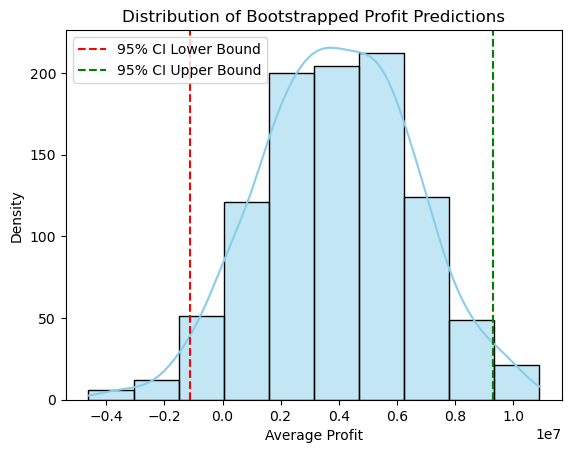

95% Confidence Interval: [-1126318.82, 9312167.43]


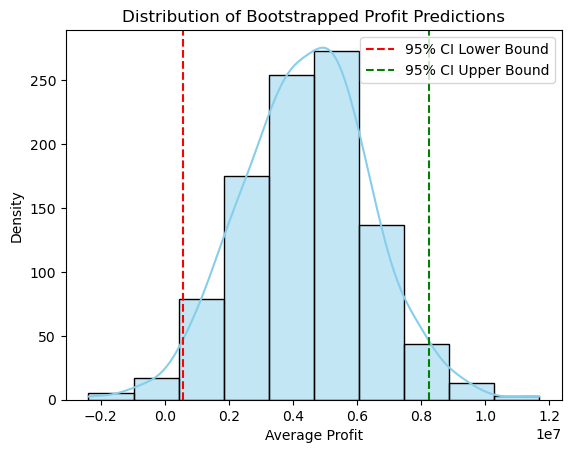

95% Confidence Interval: [581328.69, 8260582.29]


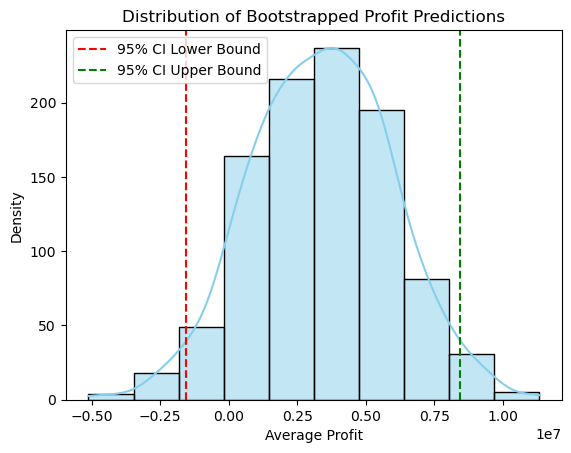

95% Confidence Interval: [-1572327.11, 8450408.33]


In [34]:
def plot_bootstrap_distribution(bootstrapped_results, confidence_level=0.95):
    # Calculate the confidence interval
    confidence_interval = np.percentile(bootstrapped_results, [100 * (1 - confidence_level) / 2, 100 * (1 + confidence_level) / 2])

    # Plot the distribution with Seaborn
    sns.histplot(bootstrapped_results, bins=10, kde=True, color='skyblue', edgecolor='black')
    
    # Add confidence interval lines
    plt.axvline(confidence_interval[0], color='red', linestyle='--', label='95% CI Lower Bound')
    plt.axvline(confidence_interval[1], color='green', linestyle='--', label='95% CI Upper Bound')
    
    plt.xlabel('Average Profit')
    plt.ylabel('Density')
    plt.title('Distribution of Bootstrapped Profit Predictions')
    plt.legend()
    plt.show()

    print(f"95% Confidence Interval: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]")

# Call the function with your bootstrapped results
plot_bootstrap_distribution(bootstrapped_results_region_1)
plot_bootstrap_distribution(bootstrapped_results_region_2)
plot_bootstrap_distribution(bootstrapped_results_region_3)

In [35]:
# Region 1 results presentation
print("Region 1")
print(f"Average Total Profit: ${average_profit:.2f} USD")
print(f"95% Confidence Interval: {confidence_interval}")
print(f"Risk of Losses (%): {risk_of_losses:.1f}%")
print()

# Region 2 results presentation
print("Region 2")
print(f"Average Total Profit: ${average_profit_2:.2f} USD")
print(f"95% Confidence Interval: {confidence_interval_2}")
print(f"Risk of Losses (%): {risk_of_losses_2:.1f}%")
print()

# Region 3 results presentation
print("Region 3")
print(f"Average Total Profit: ${average_profit_3:.2f} USD")
print(f"95% Confidence Interval: {confidence_interval_3}")
print(f"Risk of Losses (%): {risk_of_losses_3:.1f}%")


Region 1
Average Total Profit: $3947581.65 USD
95% Confidence Interval: [-1126318.82249394  9312167.43302651]
Risk of Losses (%): 6.5%

Region 2
Average Total Profit: $4420820.52 USD
95% Confidence Interval: [ 581328.69181376 8260582.29230977]
Risk of Losses (%): 1.4%

Region 3
Average Total Profit: $3408525.91 USD
95% Confidence Interval: [-1572327.11133128  8450408.33022999]
Risk of Losses (%): 8.5%


## Analysis Summary

### Region 1:

- **Average Total Profit:** $3,947,581.65 USD
- **95% Confidence Interval:** [-1,126,318.82, 9,312,167.43] USD     
- **Risk of Losses (%):** 6.5

Region 1 demonstrates a positive average total profit, indicating potential profitability. However, the relatively wide confidence interval suggests a level of uncertainty in profit estimates. The calculated risk of losses at 6.5% indicates a moderate likelihood of negative profits.

### Region 2:

- **Average Total Profit:** $4,420,820.52 USD
- **95% Confidence Interval:** [581,328.69, 8,260,582.29] USD
- **Risk of Losses (%):** 1.4

Region 2 shows a higher average total profit compared to other regions. The narrower confidence interval suggests a higher level of confidence in profit estimates. With a low risk of losses at 1.4%, Region 2 appears to be a favorable choice for oil well development due to its promising profit potential and low risk.

### Region 3:

- **Average Total Profit:** $3,408,525.91 USD
- **95% Confidence Interval:** [-1,572,327.11, 8,450,408.33] USD
- **Risk of Losses (%):** 8.5

Region 3 presents a moderate average total profit, similar to Region 1. However, the wide confidence interval and the relatively higher risk of losses at 8.5% suggest a less stable profit outlook. While the profit potential is notable, the increased risk needs careful consideration.

## Conclusion

In summary, among the three regions, **Region 2** stands out as a strong candidate for oil well development. It offers the highest average total profit, a narrow confidence interval indicating confident profit estimates, and the lowest risk of losses. **Regions 1 and 3** show potential but come with more uncertainties and relatively higher risks. Overall, the decision to develop oil wells should be driven by a careful balance between profit potential and risk tolerance.
